<a href="https://colab.research.google.com/github/ShivamSoni11/MNIST_Data_Analysis/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import the libraires**

In [ ]:
import time
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Set Random Seed for Reproducibility

In [ ]:
np.random.seed(903)

## 3. Load MNSIT ##
Keras provide very **covinent means of loading the dataset** as well as doing the **data slicing** as shown below.
Note: It is to name the attribute X(matrix) in upper-case and the label y(vector) in lower case.

In [ ]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

_,img_rows,img_cols = train_features.shape
num_classes = len(np.unique(train_labels)) # if values > 2 multi class then we use classical entrop...if == 2 then binary class then binary entrop in loss
num_input_nodes = img_rows * img_cols

print("No. of training samples  : ", train_features.shape[0])
print("No of test samples       : ", test_features.shape[0])

print("Image Rows: ",train_features.shape[1])
print("Image cols: ",train_features.shape[2])

print("Number of classes : ", num_classes)


11493376/11490434 [==============================] - 0s 0us/step
No. of training samples  :  60000
No of test samples       :  10000
Image Rows:  28
Image cols:  28
Number of classes :  10


# 4. Show Example from each class.



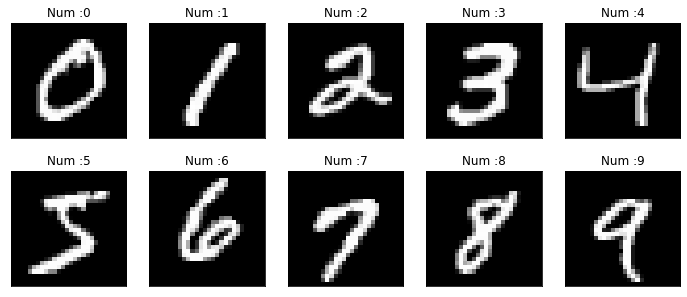

In [ ]:
fig  = plt.figure(figsize=(12,5))
for i in range(num_classes):
  ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
  features_idx = train_features[train_labels[:]==i, :]
  ax.set_title("Num :" + str(i))
  plt.imshow(features_idx[0], cmap="gray")
plt.show()


In [ ]:
train_features[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# 5. Pre-processing

In [ ]:
# reshape images to column vector

train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols) # X_train
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols) # X_test

# convert class labels to biary labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

6. Define Neural Network Model

In [ ]:
def simple_nn():
  # initialize model
  model = Sequential()

  #add an input layer and a hidden layer
  model.add(Dense(units=100,activation='sigmoid', input_dim= num_input_nodes))

  #add output layers
  model.add(Dense(units=num_classes, activation='sigmoid'))
  return model

Check model summary-

In [ ]:
# define model by calling the function created above
model = simple_nn()

# define optimizer
sgd = SGD(lr = 0.01)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

#print model information
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 7. Train the model

In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=10,
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

NameError: ignored

In [ ]:
from pprint import pprint as pp

In [ ]:
pp(model_info.history)

{'accuracy': [0.24956250190734863,
              0.445187509059906,
              0.5591874718666077,
              0.6245416402816772,
              0.6710000038146973,
              0.7048333287239075,
              0.7309166789054871,
              0.7519999742507935,
              0.7697291374206543,
              0.7856249809265137],
 'loss': [0.10611379891633987,
          0.07824485749006271,
          0.07103952765464783,
          0.06534159928560257,
          0.06068211421370506,
          0.056781377643346786,
          0.053504373878240585,
          0.05069716274738312,
          0.048234447836875916,
          0.046076443046331406],
 'val_accuracy': [0.37583333253860474,
                  0.5228333473205566,
                  0.6100833415985107,
                  0.6663333177566528,
                  0.7054166793823242,
                  0.7308333516120911,
                  0.7521666884422302,
                  0.7729166746139526,
                  0.7915833592414856,
 

8. Plot Accuracy and loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


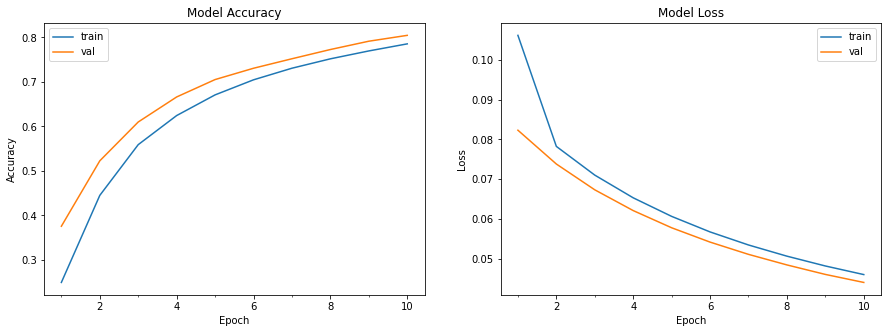

In [ ]:
def plot_model_history(model_history):
  fig, axs = plt.subplots(1, 2, figsize=(15,5))

  #Summarize history for accuracy
  axs[0].plot( range(1, len(model_history.history['accuracy'])+1), model_history.history['accuracy'])
  axs[0].plot( range(1, len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'])
  axs[0].set_title('Model Accuracy')

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')

  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len( model_history.history['accuracy'])/10 )
  axs[0].legend(['train','val'],loc='best')

  #summarize history for loss

  axs[1].plot( range(1, len(model_history.history['loss'])+1), model_history.history['loss'])
  axs[1].plot( range(1, len(model_history.history['val_loss'])+1), model_history.history['val_loss'])
  axs[1].set_title('Model Loss')

  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')

  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len( model_history.history['loss'])/10)
  axs[1].legend(['train','val'],loc='best')

  plt.show()

plot_model_history(model_info)

**Experiment With Components**

# 1. Orignal Model Testing

In [ ]:
def accuracy(test_x, test_y, model):
  result = model.predict(test_x)
  predicted_class = np.argmax(result, axis=1)
  true_class = np.argmax(test_y, axis=1)
  num_correct = np.sum(predicted_class == true_class)
  accuracy = num_correct/result.shape[0]
  return round((accuracy*100),2)

model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Accuracy on Test data is :  79.51


**Observations:**


*   Both training and validation accuracy increases as the number os epochs increases.
*   More informmation is learned in each epoch.




# 2. Vary the Learning Rate

**A) Decrease the Learning Rate from 0.01 to 0.001**

In [ ]:
# define model by calling the function created above
model = simple_nn()

# define optimizer
sgd = SGD(lr = 0.001)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

Epoch 1/10
750/750 - 2s - loss: 0.1957 - accuracy: 0.0864 - val_loss: 0.1492 - val_accuracy: 0.0983
Epoch 2/10
750/750 - 2s - loss: 0.1276 - accuracy: 0.1087 - val_loss: 0.1138 - val_accuracy: 0.1157
Epoch 3/10
750/750 - 2s - loss: 0.1070 - accuracy: 0.1263 - val_loss: 0.1023 - val_accuracy: 0.1341
Epoch 4/10
750/750 - 1s - loss: 0.0993 - accuracy: 0.1422 - val_loss: 0.0969 - val_accuracy: 0.1500
Epoch 5/10
750/750 - 1s - loss: 0.0953 - accuracy: 0.1573 - val_loss: 0.0939 - val_accuracy: 0.1673
Epoch 6/10
750/750 - 2s - loss: 0.0927 - accuracy: 0.1743 - val_loss: 0.0918 - val_accuracy: 0.1852
Epoch 7/10
750/750 - 2s - loss: 0.0909 - accuracy: 0.1926 - val_loss: 0.0902 - val_accuracy: 0.2038
Epoch 8/10
750/750 - 2s - loss: 0.0895 - accuracy: 0.2114 - val_loss: 0.0889 - val_accuracy: 0.2213
Epoch 9/10
750/750 - 1s - loss: 0.0883 - accuracy: 0.2294 - val_loss: 0.0878 - val_accuracy: 0.2395
Epoch 10/10
750/750 - 2s - loss: 0.0873 - accuracy: 0.2476 - val_loss: 0.0868 - val_accuracy: 0.2544

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


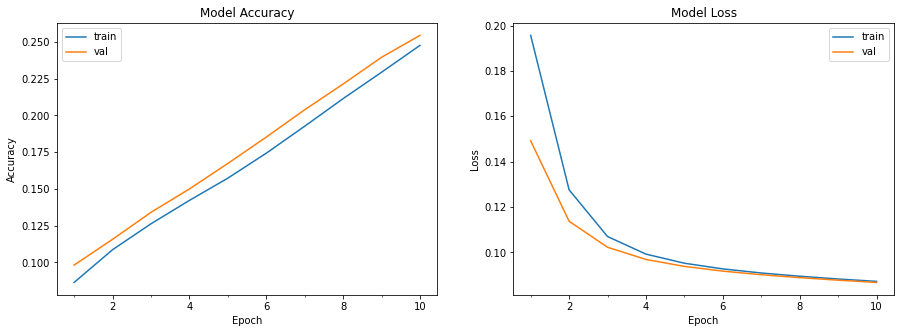



Model took 15.6 seconds to train
Accuracy on Test data is :  25.73


In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=10,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()

#plot model

plot_model_history(model_info)

#Time taken
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

#Compute the accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

**B) Increase the learning rate to 0.1**

In [ ]:
# define model by calling the function created above
model = simple_nn()

# define optimizer
sgd = SGD(lr = 0.1)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

Epoch 1/10
750/750 - 2s - loss: 0.0636 - accuracy: 0.6157 - val_loss: 0.0450 - val_accuracy: 0.7926
Epoch 2/10
750/750 - 2s - loss: 0.0391 - accuracy: 0.8250 - val_loss: 0.0324 - val_accuracy: 0.8621
Epoch 3/10
750/750 - 2s - loss: 0.0305 - accuracy: 0.8657 - val_loss: 0.0265 - val_accuracy: 0.8848
Epoch 4/10
750/750 - 2s - loss: 0.0258 - accuracy: 0.8845 - val_loss: 0.0232 - val_accuracy: 0.8976
Epoch 5/10
750/750 - 2s - loss: 0.0229 - accuracy: 0.8926 - val_loss: 0.0209 - val_accuracy: 0.9030
Epoch 6/10
750/750 - 2s - loss: 0.0209 - accuracy: 0.9015 - val_loss: 0.0196 - val_accuracy: 0.9080
Epoch 7/10
750/750 - 2s - loss: 0.0195 - accuracy: 0.9053 - val_loss: 0.0181 - val_accuracy: 0.9093
Epoch 8/10
750/750 - 1s - loss: 0.0183 - accuracy: 0.9103 - val_loss: 0.0172 - val_accuracy: 0.9147
Epoch 9/10
750/750 - 2s - loss: 0.0174 - accuracy: 0.9127 - val_loss: 0.0164 - val_accuracy: 0.9183
Epoch 10/10
750/750 - 1s - loss: 0.0166 - accuracy: 0.9168 - val_loss: 0.0159 - val_accuracy: 0.9212

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


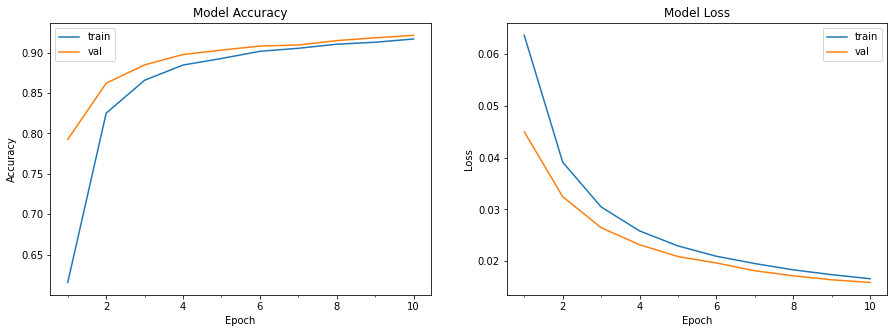



Model took 15.72 seconds to train
Accuracy on Test data is :  92.04


In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=10,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()

#plot model

plot_model_history(model_info)

#Time taken
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

#Compute the accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

## 3. Use Adam optimizer instead of SGD

In [ ]:
# define model by calling the function created above
model = simple_nn()

# Compilig the model
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

#print model information
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 4. Vary the Batch Size

A)Decrease the batch size to- 32

In [ ]:
# define model by calling the function created above
model = simple_nn()

# Compilig the model
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =32,
                       epochs=10,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

#Compute the accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Epoch 1/10
1500/1500 - 3s - loss: 0.0358 - accuracy: 0.8087 - val_loss: 0.0206 - val_accuracy: 0.8918
Epoch 2/10
1500/1500 - 3s - loss: 0.0212 - accuracy: 0.8859 - val_loss: 0.0189 - val_accuracy: 0.9013
Epoch 3/10
1500/1500 - 3s - loss: 0.0190 - accuracy: 0.8953 - val_loss: 0.0182 - val_accuracy: 0.8991
Epoch 4/10
1500/1500 - 3s - loss: 0.0176 - accuracy: 0.9005 - val_loss: 0.0163 - val_accuracy: 0.9095
Epoch 5/10
1500/1500 - 3s - loss: 0.0165 - accuracy: 0.9071 - val_loss: 0.0152 - val_accuracy: 0.9129
Epoch 6/10
1500/1500 - 3s - loss: 0.0164 - accuracy: 0.9047 - val_loss: 0.0150 - val_accuracy: 0.9109
Epoch 7/10
1500/1500 - 3s - loss: 0.0154 - accuracy: 0.9095 - val_loss: 0.0142 - val_accuracy: 0.9177
Epoch 8/10
1500/1500 - 3s - loss: 0.0150 - accuracy: 0.9134 - val_loss: 0.0149 - val_accuracy: 0.9143
Epoch 9/10
1500/1500 - 3s - loss: 0.0151 - accuracy: 0.9143 - val_loss: 0.0137 - val_accuracy: 0.9199
Epoch 10/10
1500/1500 - 3s - loss: 0.0145 - accuracy: 0.9158 - val_loss: 0.0137 - 

B) Increasing the batch size to - 128

In [ ]:
# define model by calling the function created above
model = simple_nn()

# Compilig the model
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Epoch 1/10
375/375 - 2s - loss: 0.0480 - accuracy: 0.7440 - val_loss: 0.0257 - val_accuracy: 0.8859
Epoch 2/10
375/375 - 2s - loss: 0.0222 - accuracy: 0.8930 - val_loss: 0.0178 - val_accuracy: 0.9087
Epoch 3/10
375/375 - 1s - loss: 0.0177 - accuracy: 0.9073 - val_loss: 0.0161 - val_accuracy: 0.9167
Epoch 4/10
375/375 - 1s - loss: 0.0158 - accuracy: 0.9164 - val_loss: 0.0145 - val_accuracy: 0.9227
Epoch 5/10
375/375 - 1s - loss: 0.0146 - accuracy: 0.9207 - val_loss: 0.0134 - val_accuracy: 0.9254
Epoch 6/10
375/375 - 1s - loss: 0.0138 - accuracy: 0.9247 - val_loss: 0.0132 - val_accuracy: 0.9244
Epoch 7/10
375/375 - 1s - loss: 0.0134 - accuracy: 0.9264 - val_loss: 0.0130 - val_accuracy: 0.9267
Epoch 8/10
375/375 - 1s - loss: 0.0127 - accuracy: 0.9290 - val_loss: 0.0121 - val_accuracy: 0.9317
Epoch 9/10
375/375 - 1s - loss: 0.0123 - accuracy: 0.9318 - val_loss: 0.0113 - val_accuracy: 0.9390
Epoch 10/10
375/375 - 1s - loss: 0.0118 - accuracy: 0.9335 - val_loss: 0.0115 - val_accuracy: 0.9354

Observation
Increasing the batch size **decreases the training time but reduces the rate of learning**

**5. Cost Function as Categorical Crossentropy**

In [ ]:
# define model by calling the function created above
model = simple_nn()

# Compilig the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the mode

In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Epoch 1/10
375/375 - 1s - loss: 0.8435 - accuracy: 0.7925 - val_loss: 0.4151 - val_accuracy: 0.8968
Epoch 2/10
375/375 - 1s - loss: 0.3818 - accuracy: 0.8976 - val_loss: 0.3255 - val_accuracy: 0.9133
Epoch 3/10
375/375 - 1s - loss: 0.3241 - accuracy: 0.9091 - val_loss: 0.2830 - val_accuracy: 0.9229
Epoch 4/10
375/375 - 1s - loss: 0.2958 - accuracy: 0.9176 - val_loss: 0.2717 - val_accuracy: 0.9230
Epoch 5/10
375/375 - 1s - loss: 0.2822 - accuracy: 0.9197 - val_loss: 0.2584 - val_accuracy: 0.9257
Epoch 6/10
375/375 - 1s - loss: 0.2739 - accuracy: 0.9214 - val_loss: 0.2646 - val_accuracy: 0.9222
Epoch 7/10
375/375 - 1s - loss: 0.2561 - accuracy: 0.9252 - val_loss: 0.2488 - val_accuracy: 0.9289
Epoch 8/10
375/375 - 1s - loss: 0.2568 - accuracy: 0.9240 - val_loss: 0.2437 - val_accuracy: 0.9288
Epoch 9/10
375/375 - 1s - loss: 0.2393 - accuracy: 0.9295 - val_loss: 0.2293 - val_accuracy: 0.9332
Epoch 10/10
375/375 - 1s - loss: 0.2316 - accuracy: 0.9317 - val_loss: 0.2245 - val_accuracy: 0.9340

## Observation:-

*   Changing the cost function to categorical cross entropy 
*   List item




**^. Increase the number of epochs**

In [ ]:
# define model by calling the function created above
model = simple_nn()

# Compilig the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=50,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Epoch 1/50
375/375 - 1s - loss: 0.7913 - accuracy: 0.8147 - val_loss: 0.4089 - val_accuracy: 0.8982
Epoch 2/50
375/375 - 1s - loss: 0.3797 - accuracy: 0.8974 - val_loss: 0.3337 - val_accuracy: 0.9116
Epoch 3/50
375/375 - 1s - loss: 0.3222 - accuracy: 0.9092 - val_loss: 0.2935 - val_accuracy: 0.9160
Epoch 4/50
375/375 - 1s - loss: 0.3006 - accuracy: 0.9139 - val_loss: 0.2724 - val_accuracy: 0.9211
Epoch 5/50
375/375 - 1s - loss: 0.2812 - accuracy: 0.9183 - val_loss: 0.2582 - val_accuracy: 0.9244
Epoch 6/50
375/375 - 1s - loss: 0.2631 - accuracy: 0.9241 - val_loss: 0.2402 - val_accuracy: 0.9323
Epoch 7/50
375/375 - 1s - loss: 0.2545 - accuracy: 0.9251 - val_loss: 0.2475 - val_accuracy: 0.9300
Epoch 8/50
375/375 - 1s - loss: 0.2372 - accuracy: 0.9302 - val_loss: 0.2420 - val_accuracy: 0.9303
Epoch 9/50
375/375 - 1s - loss: 0.2348 - accuracy: 0.9315 - val_loss: 0.2257 - val_accuracy: 0.9334
Epoch 10/50
375/375 - 1s - loss: 0.2301 - accuracy: 0.9321 - val_loss: 0.2203 - val_accuracy: 0.9358

## 7. Deep Neural Network
Let's define Deep Neural Network Model

In [ ]:
def deep_nn():
  # initialize model
  model = Sequential()

  #add an input layer and a hidden layer
  model.add(Dense(units=512,activation='relu', input_dim= num_input_nodes))
  model.add(Dense(units=256,activation='relu'))
  model.add(Dense(units=128,activation='relu'))
  model.add(Dense(units=64,activation='relu'))

  #add output layers
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

Compile the model

In [ ]:
model = deep_nn()

# define optimizer
sgd = SGD(lr = 0.1)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

#print model information
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


Fitting the model

In [ ]:
start = time.time()

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       verbose = 2,
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Epoch 1/10
375/375 - 5s - loss: 0.1424 - accuracy: 0.2834 - val_loss: 0.1325 - val_accuracy: 0.3339
Epoch 2/10
375/375 - 5s - loss: 0.1290 - accuracy: 0.3525 - val_loss: 0.1269 - val_accuracy: 0.3636
Epoch 3/10
375/375 - 4s - loss: 0.1281 - accuracy: 0.3561 - val_loss: 0.1271 - val_accuracy: 0.3619
Epoch 4/10
375/375 - 4s - loss: 0.1276 - accuracy: 0.3600 - val_loss: 0.1272 - val_accuracy: 0.3610
Epoch 5/10
375/375 - 4s - loss: 0.1270 - accuracy: 0.3630 - val_loss: 0.1280 - val_accuracy: 0.3588
Epoch 6/10
375/375 - 4s - loss: 0.1112 - accuracy: 0.4403 - val_loss: 0.0980 - val_accuracy: 0.5058
Epoch 7/10
375/375 - 4s - loss: 0.0935 - accuracy: 0.5287 - val_loss: 0.0826 - val_accuracy: 0.5805
Epoch 8/10
375/375 - 4s - loss: 0.0589 - accuracy: 0.7016 - val_loss: 0.0551 - val_accuracy: 0.7193
Epoch 9/10
375/375 - 4s - loss: 0.0403 - accuracy: 0.7955 - val_loss: 0.0346 - val_accuracy: 0.8245
Epoch 10/10
375/375 - 4s - loss: 0.0362 - accuracy: 0.8164 - val_loss: 0.0339 - val_accuracy: 0.8278

**Observation :**


*   By adding more hidden layers, training time as well as information learned in each epoch inceases.
*   It helps to improve the complex task but may not help significantly for relatively simple dataset such as MNIST.



**8. Save the model**

A) First Model
Specify the directory to save the model

In [ ]:
import os

model = deep_nn()

# define optimizer
sgd = SGD(lr = 0.1)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

#checkpoint
outputFolder = './output_mnist'

if not os.path.exists(outputFolder):
  os.makedirs(outputFolder)

filepath = outputFolder + "/weights.hdf5"   #use to store the best esitmated weights.
print(filepath)

./output_mnist/weights.hdf5


**Checkpoint the model and "save_best_only" model after evry epoch.**

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath,
                                      save_weights_only=True,
                                      monitor='val_accuracy',
                                      mode='auto',verbose=1,
                                      save_best_only=True)
 
callbacks_list = [checkpoint_callback]

#train the model

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       callbacks= callbacks_list,
                       verbose = 1,
                       validation_split=0.2)

model.load_weights(filepath)


Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.0905
Epoch 00001: val_accuracy improved from -inf to 0.09142, saving model to ./output_mnist/weights.hdf5
375/375 [==============================] - 5s 13ms/step - loss: 0.1818 - accuracy: 0.0905 - val_loss: 0.1817 - val_accuracy: 0.0914
Epoch 2/10
374/375 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.0900
Epoch 00002: val_accuracy did not improve from 0.09142
375/375 [==============================] - 5s 12ms/step - loss: 0.1820 - accuracy: 0.0901 - val_loss: 0.1817 - val_accuracy: 0.0914
Epoch 3/10
372/375 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.0900
Epoch 00003: val_accuracy did not improve from 0.09142
375/375 [==============================] - 5s 12ms/step - loss: 0.1820 - accuracy: 0.0901 - val_loss: 0.1817 - val_accuracy: 0.0914
Epoch 4/10
372/375 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.0901
Epoch 000

**Reload the last best saved weights in the neural netwok and resume the training further.** 

In [ ]:
model.load_weights(filepath) # last best saved values in the neural network.

# train the model

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       callbacks= callbacks_list,
                       verbose = 1,
                       validation_split=0.2)

model.load_weights(filepath)

model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )


Epoch 1/10
372/375 [============================>.] - ETA: 0s - loss: 0.0999 - accuracy: 0.4960
Epoch 00001: val_accuracy improved from 0.30258 to 0.54958, saving model to ./output_mnist/weights.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0999 - accuracy: 0.4961 - val_loss: 0.0895 - val_accuracy: 0.5496
Epoch 2/10
371/375 [============================>.] - ETA: 0s - loss: 0.0842 - accuracy: 0.5755
Epoch 00002: val_accuracy improved from 0.54958 to 0.62383, saving model to ./output_mnist/weights.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0841 - accuracy: 0.5760 - val_loss: 0.0745 - val_accuracy: 0.6238
Epoch 3/10
371/375 [============================>.] - ETA: 0s - loss: 0.0744 - accuracy: 0.6252
Epoch 00003: val_accuracy improved from 0.62383 to 0.63633, saving model to ./output_mnist/weights.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0743 - accuracy: 0.6254 - val_loss: 0.0721 - val_accuracy: 0.6363
Epoc

B) Section Method
Specify the directory to save the model


In [ ]:
import os

model = deep_nn()

# define optimizer
sgd = SGD(lr = 0.1)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

#checkpoint
outputFolder2 = './output_mnist2'

if not os.path.exists(outputFolder):
  os.makedirs(outputFolder)

filepath2 = outputFolder2 + "/weights-{epoch:02d}-{val_accuracy:.3f}.hdf5"   #use to store the best esitmated weights.
print(filepath2)


./output_mnist2/weights-{epoch:02d}-{val_accuracy:.3f}.hdf5


Create checkpoints to save the weights at the end o epoch

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath2,
                                      save_weights_only=True,
                                      monitor='val_accuracy',
                                      mode='auto',verbose=1,
                                      save_best_only=False,
                                      save_freq='epoch')

callbacks_list = [checkpoint_callback]

#train the model

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       callbacks= callbacks_list,
                       verbose = 1,
                       validation_split=0.2)

Epoch 1/10
374/375 [============================>.] - ETA: 0s - loss: 0.0341 - accuracy: 0.8282
Epoch 00001: saving model to ./output_mnist2/weights-01-0.838.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0341 - accuracy: 0.8281 - val_loss: 0.0323 - val_accuracy: 0.8377
Epoch 2/10
372/375 [============================>.] - ETA: 0s - loss: 0.0332 - accuracy: 0.8330
Epoch 00002: saving model to ./output_mnist2/weights-02-0.834.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0331 - accuracy: 0.8332 - val_loss: 0.0329 - val_accuracy: 0.8342
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.8265
Epoch 00003: saving model to ./output_mnist2/weights-03-0.837.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0344 - accuracy: 0.8265 - val_loss: 0.0325 - val_accuracy: 0.8367
Epoch 4/10
371/375 [============================>.] - ETA: 0s - loss: 0.0326 - accuracy: 0.8358
Epoch 00004: saving

In [ ]:
filepath2 = outputFolder2 + "/weights-{epoch:02d}-{val_accuracy:.3f}.hdf5"   #use to store the best esitmated weights.

checkpoint_callback = ModelCheckpoint(filepath2,
                                      monitor='val_accuracy',
                                      mode='auto',verbose=1,
                                      save_best_only=False,
                                      save_weights_only=False,
                                      save_freq='epoch')

callbacks_list = [checkpoint_callback]

#train the model

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       initial_epoch=10,
                       epochs=20,
                       callbacks= callbacks_list,
                       verbose = 1,
                       validation_split=0.2)

# Compute the test accuracy

model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is : ", model_accuracy )

Epoch 11/20
374/375 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.8465
Epoch 00011: saving model to ./output_mnist2/weights-11-0.850.hdf5
375/375 [==============================] - 5s 13ms/step - loss: 0.0305 - accuracy: 0.8466 - val_loss: 0.0297 - val_accuracy: 0.8504
Epoch 12/20
371/375 [============================>.] - ETA: 0s - loss: 0.0299 - accuracy: 0.8493
Epoch 00012: saving model to ./output_mnist2/weights-12-0.843.hdf5
375/375 [==============================] - 5s 13ms/step - loss: 0.0299 - accuracy: 0.8493 - val_loss: 0.0310 - val_accuracy: 0.8433
Epoch 13/20
374/375 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.8459
Epoch 00013: saving model to ./output_mnist2/weights-13-0.842.hdf5
375/375 [==============================] - 5s 12ms/step - loss: 0.0305 - accuracy: 0.8460 - val_loss: 0.0312 - val_accuracy: 0.8422
Epoch 14/20
373/375 [============================>.] - ETA: 0s - loss: 0.0295 - accuracy: 0.8514
Epoch 00014: sa

**9) Early Stopping**

In [ ]:
 import os

model = deep_nn()

# define optimizer
sgd = SGD(lr = 0.1)

# Compilig the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

#checkpoint
outputFolder3 = './output_mnist3'

if not os.path.exists(outputFolder3):
  os.makedirs(outputFolder3)

filepath3 = outputFolder2 + "/weights-{epoch:02d}-{val_accuracy:.3f}.hdf5"   #use to store the best esitmated weights.
print(filepath3)


./output_mnist2/weights-{epoch:02d}-{val_accuracy:.3f}.hdf5


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import 

checkpoint_callback = ModelCheckpoint(filepath2,
                                      save_weights_only=True,
                                      monitor='val_accuracy',
                                      mode='auto',verbose=1,
                                      save_best_only=False,
                                      save_freq='epoch')

callbacks_list = [checkpoint_callback]

#train the model

model_info = model.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=10,
                       callbacks= callbacks_list,
                       verbose = 1,
                       validation_split=0.2)